### xlsx를 csv로 바꾸기

In [2]:
pip install xlrd openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### ❓xlsx를 csv로 바꾸기

pip install openpyxl xlrd pandas

    * import pandas as pd
    * xlsx = pd.read_excel('경로.xlsx')
    * xlsx.to_csv('경로.csv')   # csv파일 생성

In [3]:
import matplotlib.font_manager as font_manager

# 특정 위치에 있는 모든 폰트 찾기
font_dir = ['/Users/kimminsoo/opt/anaconda3/lib/python3.9/site-packages/IPython/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

# font.family 설정
mpl.rcParams['font.family'] = 'NanumGothicOTF'
print(mpl.rcParams['font.family'])

Kyobo Handwriting 2021
NanumGothicOTF
['NanumGothicOTF']


### 1. 데이터 산업 업종별 영위 기업 수
    1) xlsx파일에서 csv파일로 변환
    2) csv파일로 변환된 데이터에서 첫 번째 열을 삭제후 DataFrame형태로 출력
    3) 'unnamed: 0', 'unnamed: 1'을 '업종 중분류', '업종 소분류'로 변경
    4) 연도별 업종 중분류 영위 기업 증가세? barplot
    5) 연도별 업종 소분류 영위 기업 증가세? barplot
    6) 2021년 기준 업종 소분류 별 점유율

#### 1-1. xlsx파일에서 csv파일로 변환

In [41]:
# xlsx파일 데이터를 csv로 변환 후 DataFrame형태로 불러오기 
xlsx = pd.read_excel('./data_ids_companycounts.xlsx')
data_report = xlsx.to_csv('./data_ids_companycounts.csv')
data_ids_report = pd.read_csv('./data_ids_companycounts.csv')

data_ids_report

,Unnamed: 0.1,Unnamed: 0,Unnamed: 1,2016년,2017년,2018년,2019년,2020년,2021년
0,0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 수집·연계 솔루션 개발·공급업,399,341,445,504,518,551
1,1,데이터 처리 및 관리 솔루션 개발·공급업,데이터베이스 관리 시스템 솔루션 개발·공급업,155,135,119,146,149,186
2,2,데이터 처리 및 관리 솔루션 개발·공급업,데이터 분석 솔루션 개발·공급업,203,183,239,322,365,446
3,3,데이터 처리 및 관리 솔루션 개발·공급업,데이터 관리 솔루션 개발·공급업,879,854,1099,1059,1062,1105
4,4,데이터 처리 및 관리 솔루션 개발·공급업,데이터 보안 솔루션 개발·공급업,879,854,150,199,235,302
5,5,데이터 처리 및 관리 솔루션 개발·공급업,빅데이터 통합 플랫폼 솔루션 개발·공급업,65,95,78,126,158,206
6,6,데이터 구축 및 컨설팅 서비스업,데이터 구축/가공 서비스업,1870,1594,2252,2140,2158,2229
7,7,데이터 구축 및 컨설팅 서비스업,데이터 관련 컨설팅 서비스업,811,1004,419,534,593,729
8,8,데이터 판매 및 제공 서비스업,데이터 판매/중개 서비스업,2041,310,287,367,494,567
9,9,데이터 판매 및 제공 서비스업,정보제공 서비스업,303,2617,2065,2222,2282,2419


#### 1-2. csv파일로 변환된 데이터에서 첫 번째 열을 삭제후 DataFrame형태로 출력
#### 1-3. 'unnamed: 0', 'unnamed: 1'을 '업종 중분류', '업종 소분류'로 변경

In [5]:
# 첫번째 열 삭제 후, column 'Unnamed: 0', 'Unnamed: 1'를 '업종 중분류', '업종 소분류'로 변경
data_ids_companycounts = data_ids_report.drop(data_ids_report.columns[0], axis=1)
data_ids_companycounts = data_ids_companycounts.rename(columns={'Unnamed: 0':'업종 중분류', 'Unnamed: 1':'업종 소분류'})
data_ids_companycounts


,업종 중분류,업종 소분류,2016년,2017년,2018년,2019년,2020년,2021년
0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 수집·연계 솔루션 개발·공급업,399,341,445,504,518,551
1,데이터 처리 및 관리 솔루션 개발·공급업,데이터베이스 관리 시스템 솔루션 개발·공급업,155,135,119,146,149,186
2,데이터 처리 및 관리 솔루션 개발·공급업,데이터 분석 솔루션 개발·공급업,203,183,239,322,365,446
3,데이터 처리 및 관리 솔루션 개발·공급업,데이터 관리 솔루션 개발·공급업,879,854,1099,1059,1062,1105
4,데이터 처리 및 관리 솔루션 개발·공급업,데이터 보안 솔루션 개발·공급업,879,854,150,199,235,302
5,데이터 처리 및 관리 솔루션 개발·공급업,빅데이터 통합 플랫폼 솔루션 개발·공급업,65,95,78,126,158,206
6,데이터 구축 및 컨설팅 서비스업,데이터 구축/가공 서비스업,1870,1594,2252,2140,2158,2229
7,데이터 구축 및 컨설팅 서비스업,데이터 관련 컨설팅 서비스업,811,1004,419,534,593,729
8,데이터 판매 및 제공 서비스업,데이터 판매/중개 서비스업,2041,310,287,367,494,567
9,데이터 판매 및 제공 서비스업,정보제공 서비스업,303,2617,2065,2222,2282,2419


#### 1-4. 연도별 업종 중분류 영위 기업 수

In [6]:
# 연도별 업종 중분류 영위 기업 증가세

# 1) 데이터 처리 및 관리 솔루션 개발•공급업 합계
# 1-1) companycounts DataFrame에서 업종 중분류(데이터 처리 및 관리 솔루션 개발•공급업)만 슬라이싱
# 1-2) column0, 1을 제거한 데이터만의 합계의 Series
year_midtype_develop = data_ids_companycounts[0:6].drop(data_ids_companycounts[0:6].columns[0:2], axis=1)
develop = year_midtype_develop.sum()
develop_values=develop.values
develop_columns=develop.index

print(year_midtype_develop)

# 2) 데이터 구축 및 컨설팅 서비스업 합계
# 2-1) companycounts DataFrame에서 업종 중분류(데이터 구축 및 컨설팅 서비스업)만 슬라이싱
# 2-2) column0, 1을 제거한 데이터만의 합계의 Series
year_midtype_service = data_ids_companycounts[6:8].drop(data_ids_companycounts[6:8].columns[0:2], axis=1)
service = year_midtype_service.sum()
service_values=service.values
service_columns=service.index

print(year_midtype_service)

# 3) 데이터 판매 및 제공 서비스업 합계
# 3-1) companycounts DataFrame에서 업종 중분류(데이터 판매 및 제공 서비스업)만 슬라이싱
# 3-2) column0, 1을 제거한 데이터만의 합계의 Series
year_midtype_sales = data_ids_companycounts[8:10].drop(data_ids_companycounts[8:10].columns[0:2], axis=1)
sales = year_midtype_sales.sum()
sales_values=sales.values
sales_columns=sales.index

print(year_midtype_sales)

   2016년  2017년  2018년  2019년  2020년  2021년
0    399    341    445    504    518    551
1    155    135    119    146    149    186
2    203    183    239    322    365    446
3    879    854   1099   1059   1062   1105
4    879    854    150    199    235    302
5     65     95     78    126    158    206
   2016년  2017년  2018년  2019년  2020년  2021년
6   1870   1594   2252   2140   2158   2229
7    811   1004    419    534    593    729
   2016년  2017년  2018년  2019년  2020년  2021년
8   2041    310    287    367    494    567
9    303   2617   2065   2222   2282   2419


In [181]:
# 4) 연도별 업종 중분류 영위 기업 DataFrame
df_sum = pd.DataFrame(data=[develop_values, service_values, sales_values])
df_sum = df_sum.rename(index={0:'데이터 처리 및 관리 솔루션 개발•공급업', 1:'데이터 구축 및 컨설팅 서비스업', 2:'데이터 판매 및 제공 서비스업'}
                       , columns={0:'2016', 1:'2017', 2:'2018', 3:'2019', 4:'2020', 5:'2021'})
df_sum

,2016,2017,2018,2019,2020,2021
데이터 처리 및 관리 솔루션 개발•공급업,2580,2462,2130,2356,2487,2796
데이터 구축 및 컨설팅 서비스업,2681,2598,2671,2674,2751,2958
데이터 판매 및 제공 서비스업,2344,2927,2352,2589,2776,2986


#### 1-5. barplot

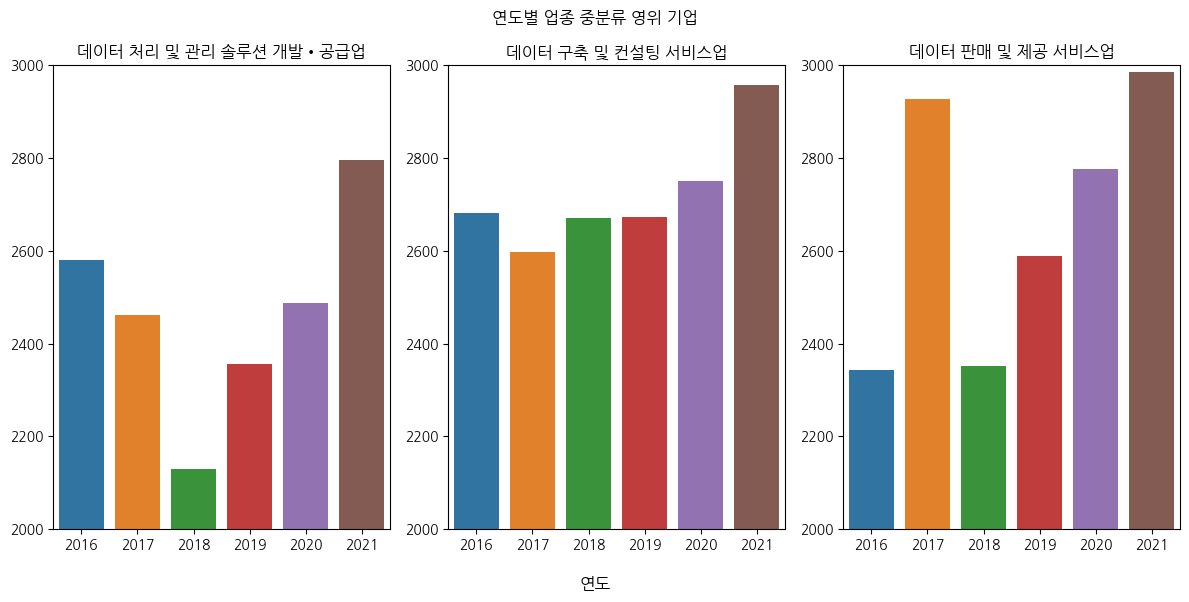

In [184]:
# 5) barplot
mpl.rcParams["figure.figsize"] = (12, 6)
fig, axs = plt.subplots(1, 3)

fig.suptitle("연도별 업종 중분류 영위 기업")
fig.supxlabel("연도")

for index in range(len(df_sum.index)):
    sns.barplot(x=df_sum.iloc[index].index, 
                y=df_sum.iloc[index], 
                ax=axs[index])
    axs[index].set_ylim(2000, 3000)
    axs[index].set_title(df_sum.index[index])
    axs[index].set_ylabel(None)
plt.tight_layout()
plt.show()

#### 1-6. 연도별 업종 소분류 영위 기업

In [55]:
# 연도별 업종 소분류 영위 기업 증가세
data_ids_report

# 1) column0(업종 중분류) 삭제
data_ids_companycounts = data_ids_report.drop(data_ids_report.columns[0:2], axis=1)
data_ids_companycounts = data_ids_companycounts.rename(columns={'Unnamed: 0':'업종 중분류', 'Unnamed: 1':'업종 소분류'})
data_ids_companycounts

,업종 소분류,2016년,2017년,2018년,2019년,2020년,2021년
0,데이터 수집·연계 솔루션 개발·공급업,399,341,445,504,518,551
1,데이터베이스 관리 시스템 솔루션 개발·공급업,155,135,119,146,149,186
2,데이터 분석 솔루션 개발·공급업,203,183,239,322,365,446
3,데이터 관리 솔루션 개발·공급업,879,854,1099,1059,1062,1105
4,데이터 보안 솔루션 개발·공급업,879,854,150,199,235,302
5,빅데이터 통합 플랫폼 솔루션 개발·공급업,65,95,78,126,158,206
6,데이터 구축/가공 서비스업,1870,1594,2252,2140,2158,2229
7,데이터 관련 컨설팅 서비스업,811,1004,419,534,593,729
8,데이터 판매/중개 서비스업,2041,310,287,367,494,567
9,정보제공 서비스업,303,2617,2065,2222,2282,2419


#### 1-7. barplot

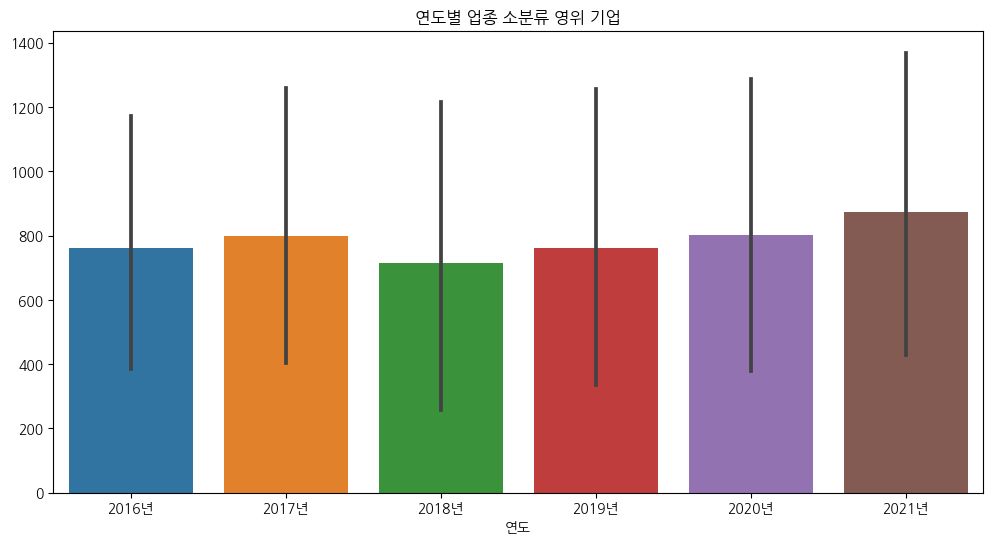

In [189]:
# 2) barplot
plt.title("연도별 업종 소분류 영위 기업")
plt.xlabel("연도")
sns.barplot(data=data_ids_companycounts)
plt.show()

### 2. 데이터산업 시장규모-매출(억원)

    1) xlsx파일에서 csv파일로 변환
    2) csv파일로 변환된 데이터에서 DataFrame형태로 출력
    3) 'unnamed: 0', 'unnamed: 1'을 '업종 중분류', '업종 소분류'로 변경
    4) int값 데이터를 소수점 첫째자리까지로 통일
    4) 연도별 업종 중분류 시장규모 - barplot
    5) 연도별 업종 소분류 시장규모 - barplot
    6) 2021년 기준 업종 소분류 별 점유율

#### 2-1. xlsx파일에서 csv파일로 변환
#### 2-2. csv파일로 변환된 데이터에서 DataFrame형태로 출력
#### 2-3. 'unnamed: 0', 'unnamed: 1'을 '업종 중분류', '업종 소분류'로 변경

In [11]:
# xlsx파일 데이터를 csv로 변환 후 DataFrame형태로 불러오기 
xlsx2 = pd.read_excel('./data_ids_sales.xlsx')
data_report2 = xlsx2.to_csv('./data_ids_sales.csv')
data_ids_report2 = pd.read_csv('./data_ids_sales.csv')

data_ids_sales = data_ids_report2.drop(data_ids_report2.columns[0], axis=1)
data_ids_sales = data_ids_sales.rename(columns={'Unnamed: 0':'업종 중분류', 'Unnamed: 1':'업종 소분류'})
data_ids_sales

,업종 중분류,업종 소분류,2016년,2017년,2018년,2019년,2020년,2021년 (E)
0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 수집·연계 솔루션 개발·공급업,1345,1393,1621.772014,1871.235803,2122,2787
1,데이터 처리 및 관리 솔루션 개발·공급업,데이터베이스 관리 시스템 솔루션 개발·공급업,6148,6121,6775.481280,7509.620281,8979,11062
2,데이터 처리 및 관리 솔루션 개발·공급업,데이터 분석 솔루션 개발·공급업,1249,1325,1781.516155,2014.369121,2586,2951
3,데이터 처리 및 관리 솔루션 개발·공급업,데이터 관리 솔루션 개발·공급업,5367,4628,4971.604003,5203.494864,6022,7151
4,데이터 처리 및 관리 솔루션 개발·공급업,데이터 보안 솔루션 개발·공급업,5367,1213,1516.904050,1975.393368,2558,3146
5,데이터 처리 및 관리 솔루션 개발·공급업,빅데이터 통합 플랫폼 솔루션 개발·공급업,1611,1776,1949.404500,2231.278359,2866,3468
6,데이터 구축 및 컨설팅 서비스업,데이터 구축/가공 서비스업,54571,57207,58993.113875,62222.502732,72805,81188
7,데이터 구축 및 컨설팅 서비스업,데이터 관련 컨설팅 서비스업,1279,1687,2296.717025,3189.179358,4194,5147
8,데이터 판매 및 제공 서비스업,데이터 판매/중개 서비스업,6123,6608,8198.186753,11331.937956,16054,20781
9,데이터 판매 및 제공 서비스업,정보제공 서비스업,59854,61570,67579.799051,71032.535398,81838,93289


#### 2-4. 연도별 업종 중분류 시장규모

In [12]:

# 1) 데이터 처리 및 관리 솔루션 개발•공급업 합계
# 1-1) data_ids_sales DataFrame에서 업종 중분류(데이터 처리 및 관리 솔루션 개발•공급업)만 슬라이싱
# 1-2) column0, 1을 제거한 데이터만의 합계의 Series
year_midtype_develop1 = data_ids_sales[0:6].drop(data_ids_sales[0:6].columns[0:2], axis=1)
develop1 = year_midtype_develop1.sum()
develop1_values=develop1.values
develop1_columns=develop1.index

print(year_midtype_develop1)

# 2) 데이터 구축 및 컨설팅 서비스업 합계
# 2-1) data_ids_sales DataFrame에서 업종 중분류(데이터 구축 및 컨설팅 서비스업)만 슬라이싱
# 2-2) column0, 1을 제거한 데이터만의 합계의 Series
year_midtype_service1 = data_ids_sales[6:8].drop(data_ids_sales[6:8].columns[0:2], axis=1)
service1 = year_midtype_service1.sum()
service1_values=service1.values
service1_columns=service1.index

print(year_midtype_service1)

# 3) 데이터 판매 및 제공 서비스업 합계
# 3-1) data_ids_sales DataFrame에서 업종 중분류(데이터 판매 및 제공 서비스업)만 슬라이싱
# 3-2) column0, 1을 제거한 데이터만의 합계의 Series
year_midtype_sales1 = data_ids_sales[8:10].drop(data_ids_sales[8:10].columns[0:2], axis=1)
sales1 = year_midtype_sales1.sum()
sales1_values=sales1.values
sales1_columns=sales1.index

print(year_midtype_sales1)

   2016년  2017년        2018년        2019년  2020년  2021년 (E)
0   1345   1393  1621.772014  1871.235803   2122       2787
1   6148   6121  6775.481280  7509.620281   8979      11062
2   1249   1325  1781.516155  2014.369121   2586       2951
3   5367   4628  4971.604003  5203.494864   6022       7151
4   5367   1213  1516.904050  1975.393368   2558       3146
5   1611   1776  1949.404500  2231.278359   2866       3468
   2016년  2017년         2018년         2019년  2020년  2021년 (E)
6  54571  57207  58993.113875  62222.502732  72805      81188
7   1279   1687   2296.717025   3189.179358   4194       5147
   2016년  2017년         2018년         2019년  2020년  2021년 (E)
8   6123   6608   8198.186753  11331.937956  16054      20781
9  59854  61570  67579.799051  71032.535398  81838      93289


In [59]:
# 4) 연도별 업종 중분류 시장규모 DataFrame
df1_sum = pd.DataFrame(data=[develop1_values, service1_values, sales1_values])
df1_sum = df1_sum.rename(index={0:'데이터 처리 및 관리 솔루션 개발•공급업', 1:'데이터 구축 및 컨설팅 서비스업', 2:'데이터 판매 및 제공 서비스업'}
                       , columns={0:'2016', 1:'2017', 2:'2018', 3:'2019', 4:'2020', 5:'2021'})
df1_sum.round(1)

,2016,2017,2018,2019,2020,2021
데이터 처리 및 관리 솔루션 개발•공급업,21087.0,16456.0,18616.7,20805.4,25133.0,30565.0
데이터 구축 및 컨설팅 서비스업,55850.0,58894.0,61289.8,65411.7,76999.0,86335.0
데이터 판매 및 제공 서비스업,65977.0,68178.0,75778.0,82364.5,97892.0,114070.0


#### 2-5. barplot

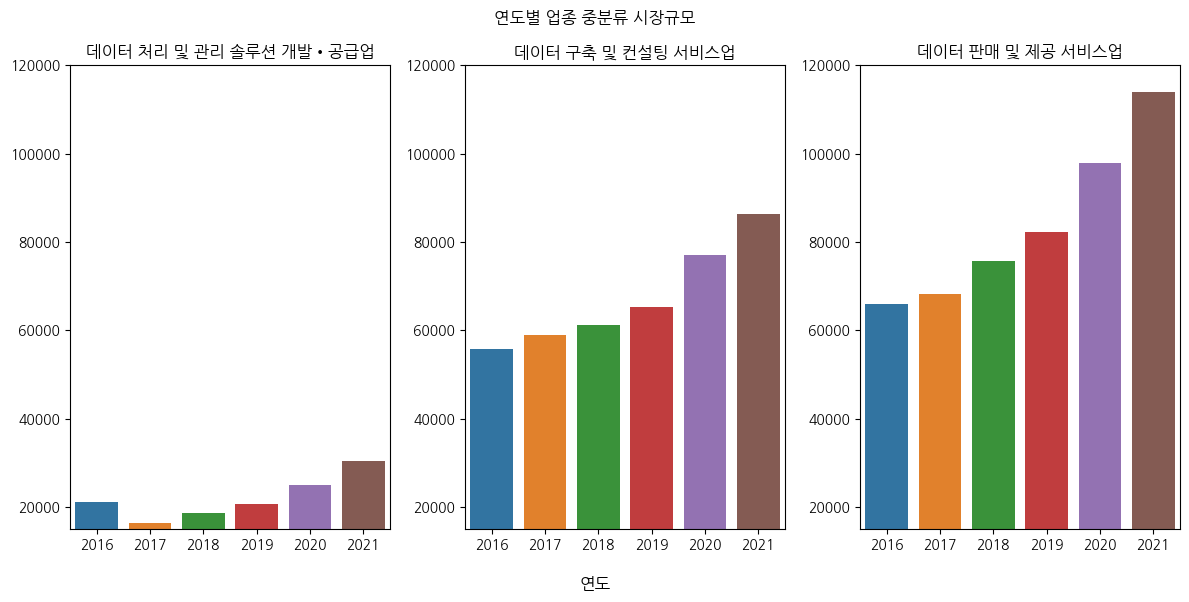

In [179]:
# 5) barplot
mpl.rcParams["figure.figsize"] = (12, 6)
fig, axs = plt.subplots(1, 3)

fig.suptitle("연도별 업종 중분류 시장규모")
fig.supxlabel("연도")

for index in range(len(df1_sum.index)):
    sns.barplot(x=df1_sum.iloc[index].index, 
                y=df1_sum.iloc[index], 
                ax=axs[index])
    axs[index].set_ylim(15000, 120000)
    axs[index].set_title(df1_sum.index[index])
    axs[index].set_ylabel(None)
plt.tight_layout()
plt.show()

#### 2-5-1. pie chart 

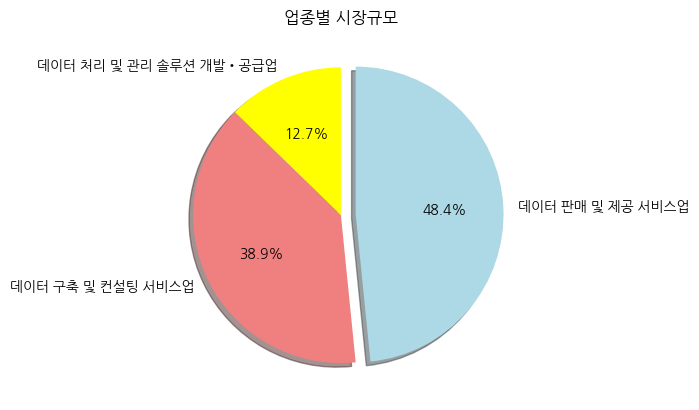

In [76]:
df1_total = df1_sum.round(1).sum(axis=1)
df1_totals = ((df1_total / df1_total.sum()) * 100)
df1_totals

explode = [0, 0, 0.1]
colors = ['yellow', 'lightcoral', 'lightblue']

plt.title('업종별 시장규모')
plt.pie(df1_totals.values, explode=explode, labels=df1_totals.index, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

#### 2-6. 연도별 업종 소분류 시장규모

In [16]:
# 연도별 업종 소분류 시장규모

# 1) column0(업종 중분류) 삭제
data_ids_sales = data_ids_sales.drop(data_ids_sales.columns[0], axis=1)
data_ids_sales

,업종 소분류,2016년,2017년,2018년,2019년,2020년,2021년 (E)
0,데이터 수집·연계 솔루션 개발·공급업,1345,1393,1621.772014,1871.235803,2122,2787
1,데이터베이스 관리 시스템 솔루션 개발·공급업,6148,6121,6775.481280,7509.620281,8979,11062
2,데이터 분석 솔루션 개발·공급업,1249,1325,1781.516155,2014.369121,2586,2951
3,데이터 관리 솔루션 개발·공급업,5367,4628,4971.604003,5203.494864,6022,7151
4,데이터 보안 솔루션 개발·공급업,5367,1213,1516.904050,1975.393368,2558,3146
5,빅데이터 통합 플랫폼 솔루션 개발·공급업,1611,1776,1949.404500,2231.278359,2866,3468
6,데이터 구축/가공 서비스업,54571,57207,58993.113875,62222.502732,72805,81188
7,데이터 관련 컨설팅 서비스업,1279,1687,2296.717025,3189.179358,4194,5147
8,데이터 판매/중개 서비스업,6123,6608,8198.186753,11331.937956,16054,20781
9,정보제공 서비스업,59854,61570,67579.799051,71032.535398,81838,93289


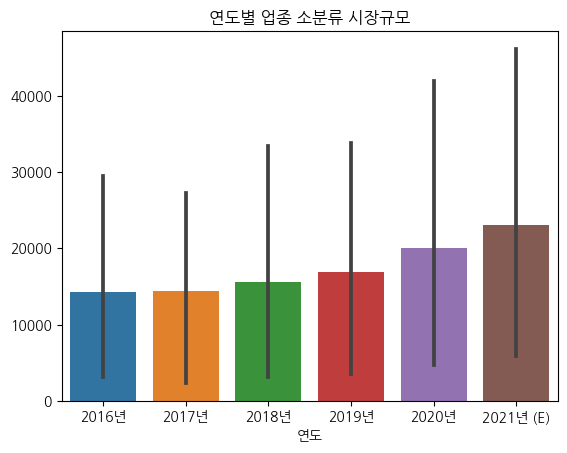

In [31]:
# 2) barplot
plt.title("연도별 업종 소분류 시장규모")
plt.xlabel("연도")
sns.barplot(data=data_ids_sales)
plt.show()

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_17124/2392139362.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ids_sum = data_ids_sales.sum(axis=1).rename(index={0:'데이터 수집·연계 솔루션 개발·공급업',


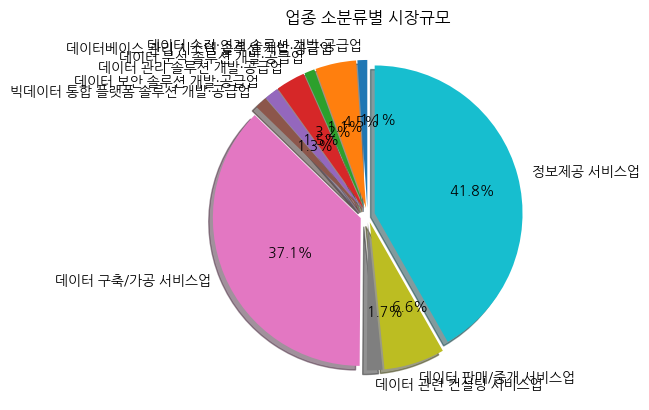

In [94]:
# pie chart
ids_sum = data_ids_sales.sum(axis=1).rename(index={0:'데이터 수집·연계 솔루션 개발·공급업',
                                                   1:'데이터베이스 관리 시스템 솔루션 개발·공급업',
                                                   2:'데이터 분석 솔루션 개발·공급업',
                                                   3:'데이터 관리 솔루션 개발·공급업',
                                                   4:'데이터 보안 솔루션 개발·공급업',
                                                   5:'빅데이터 통합 플랫폼 솔루션 개발·공급업',
                                                   6:'데이터 구축/가공 서비스업',
                                                   7:'데이터 관련 컨설팅 서비스업',
                                                   8:'데이터 판매/중개 서비스업',
                                                   9:'정보제공 서비스업'})

ids_totals = ids_sum.sum()
ids_avg = (ids_sum / ids_totals) * 100
ids_avg

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

plt.title('업종 소분류별 시장규모')
plt.pie(ids_avg.values, explode=explode, labels=ids_avg.index,
        autopct='%10.1f%%', shadow=True, startangle=90)
plt.show()

### 3. 데이터산업의 데이터직무별 인력 현황

    1) xlsx파일에서 csv파일로 변환
    2) csv파일로 변환된 데이터에서 DataFrame형태로 출력
    3) 'unnamed: 0', 'unnamed: 1'을 '업종 중분류', '직무'로 변경

In [53]:
xlsx3 = pd.read_excel('./data_ids_jobmanpower.xlsx')
data_report2 = xlsx3.to_csv('./data_ids_jobmanpower.csv')
data_ids_report3 = pd.read_csv('./data_ids_jobmanpower.csv')
data_ids_jobmanpower = data_ids_report3.drop(data_ids_report3.columns[0], axis=1)
data_ids_jobmanpower

,Unnamed: 0,Unnamed: 1,2016년,2017년,2018년,2019년,2020년,2021년
0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 아키텍트,569,618,806,1202,1588,2061
1,데이터 처리 및 관리 솔루션 개발·공급업,데이터 개발자,3835,4429,4579,4799,5683,7891
2,데이터 처리 및 관리 솔루션 개발·공급업,데이터 엔지니어,1380,1468,1616,1862,2421,3276
3,데이터 처리 및 관리 솔루션 개발·공급업,데이터 분석가,588,629,892,1039,1292,1519
4,데이터 처리 및 관리 솔루션 개발·공급업,데이터베이스관리자,648,702,842,1023,1409,1769
5,데이터 처리 및 관리 솔루션 개발·공급업,데이터 과학자,203,218,218,288,540,762
6,데이터 처리 및 관리 솔루션 개발·공급업,데이터 컨설턴트,1446,1530,1736,2076,2265,2556
7,데이터 처리 및 관리 솔루션 개발·공급업,데이터 기획자,603,697,852,1177,2075,2289
8,데이터 구축 및 컨설팅 서비스업,데이터 아키텍트,3712,3918,4330,4355,4915,6044
9,데이터 구축 및 컨설팅 서비스업,데이터 개발자,14971,15890,16302,17092,18173,21858


### 4. 데이터산업의 데이터직무별 필요 인력

    1) xlsx파일에서 csv파일로 변환
    2) csv파일로 변환된 데이터에서 DataFrame형태로 출력
    3) 'unnamed: 0', 'unnamed: 1'을 '업종 중분류', '직무'로 변경

#### 4-1. xlsx파일에서 csv파일로 변환
#### 4-2. csv파일로 변환된 데이터에서 DataFrame형태로 출력

In [22]:
xlsx4 = pd.read_excel('./data_ids_jobmanpower.xlsx')
data_report4 = xlsx4.to_csv('./data_ids_jobmanpower.csv')
data_ids_report4 = pd.read_csv('./data_ids_jobmanpower.csv')
data_ids_necemanpower = data_ids_report4.drop(data_ids_report4.columns[0], axis=1)
data_ids_necemanpower

,Unnamed: 0,Unnamed: 1,2016년,2017년,2018년,2019년,2020년,2021년
0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 아키텍트,569,618,806,1202,1588,2061
1,데이터 처리 및 관리 솔루션 개발·공급업,데이터 개발자,3835,4429,4579,4799,5683,7891
2,데이터 처리 및 관리 솔루션 개발·공급업,데이터 엔지니어,1380,1468,1616,1862,2421,3276
3,데이터 처리 및 관리 솔루션 개발·공급업,데이터 분석가,588,629,892,1039,1292,1519
4,데이터 처리 및 관리 솔루션 개발·공급업,데이터베이스관리자,648,702,842,1023,1409,1769
5,데이터 처리 및 관리 솔루션 개발·공급업,데이터 과학자,203,218,218,288,540,762
6,데이터 처리 및 관리 솔루션 개발·공급업,데이터 컨설턴트,1446,1530,1736,2076,2265,2556
7,데이터 처리 및 관리 솔루션 개발·공급업,데이터 기획자,603,697,852,1177,2075,2289
8,데이터 구축 및 컨설팅 서비스업,데이터 아키텍트,3712,3918,4330,4355,4915,6044
9,데이터 구축 및 컨설팅 서비스업,데이터 개발자,14971,15890,16302,17092,18173,21858


#### 4-3. 'unnamed: 0', 'unnamed: 1'을 '업종 중분류', '직무'로 변경
#### 4-4. column1(직무)를 기준으로 내림차순 정렬

In [97]:
# 'unnamed: 0', 'unnamed: 1'을 '업종 중분류', '업종 직무'로 변경
# column1(직무)를 기준으로 내림차순 정렬
data_ids_necemanpower = data_ids_necemanpower.rename(columns={'Unnamed: 0':'업종 중분류', 'Unnamed: 1':'직무'})
necemanpower = data_ids_necemanpower.sort_values(by='직무').drop(data_ids_necemanpower.columns[0], axis=1)
necemanpower

,직무,2016년,2017년,2018년,2019년,2020년,2021년
1,데이터 개발자,3835,4429,4579,4799,5683,7891
17,데이터 개발자,8573,8948,9141,9439,10229,12379
9,데이터 개발자,14971,15890,16302,17092,18173,21858
21,데이터 과학자,444,482,486,536,732,823
5,데이터 과학자,203,218,218,288,540,762
13,데이터 과학자,538,583,581,784,1149,1443
23,데이터 기획자,5545,5600,5912,6384,6889,7447
15,데이터 기획자,1151,1200,1478,2274,2845,3101
7,데이터 기획자,603,697,852,1177,2075,2289
19,데이터 분석가,2072,2190,2471,2737,3251,4113


In [ ]:
# 3) 데이터 판매 및 제공 서비스업 합계
# 3-1) data_ids_sales DataFrame에서 업종 중분류(데이터 판매 및 제공 서비스업)만 슬라이싱
# 3-2) column0, 1을 제거한 데이터만의 합계의 Series
year_midtype_sales1 = data_ids_sales[8:10].drop(data_ids_sales[8:10].columns[0:2], axis=1)
sales1 = year_midtype_sales1.sum()
sales1_values=sales1.values
sales1_columns=sales1.index

print(year_midtype_sales1)

### 5. 검색엔진기반으로 각 직무별 검색량

    1) 네이버 검색어트렌트를 활용하여 검색량을 확인
        - 최다 검색량을 100으로 설정하여 상대적인 변화를 나타내므로 

In [219]:
xlsx5 = pd.read_excel('./datalab.xlsx')
data_report5 = xlsx5.to_csv('./datalab.csv')
data_lab = pd.read_csv('./datalab.csv').drop(data_lab.columns[0], axis=1)
data_lab

,날짜,데이터 개발자,데이터 개발자.1,데이터 개발자.2,데이터 개발자.3,데이터 개발자.4,데이터 개발자 합계,데이터 과학자,데이터 과학자.1,데이터 과학자.2,...,데이터 컨설턴트.2,데이터 컨설턴트.3,데이터 컨설턴트.4,데이터 컨설턴트 합계,데이터베이스관리자,데이터베이스관리자.1,데이터베이스관리자.2,데이터베이스관리자.3,데이터베이스관리자.4,데이터베이스관리자 합계
0,2018-01-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,32.04283,32.04283,32.04283,...,0.00000,0.00000,0.00000,0.00000,17.87479,17.87479,17.87479,17.87479,50.58275,122.08191
1,2018-02-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,29.44810,29.44810,29.44810,...,0.00000,0.00000,0.00000,0.00000,14.29159,14.29159,14.29159,14.29159,40.44289,97.60925
2,2018-03-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,39.42888,39.42888,39.42888,...,0.00000,0.00000,0.00000,0.00000,32.12520,32.12520,32.12520,32.12520,90.90909,219.40989
3,2018-04-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,32.77045,32.77045,32.77045,...,0.00000,0.00000,0.00000,0.00000,25.16474,25.16474,25.16474,25.16474,71.21212,171.87108
4,2018-05-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,35.33772,35.33772,35.33772,...,0.00000,0.00000,0.00000,0.00000,25.65897,25.65897,25.65897,25.65897,72.61072,175.24660
5,2018-06-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,34.52773,34.52773,34.52773,...,0.00000,0.00000,0.00000,0.00000,22.03459,22.03459,22.03459,22.03459,62.35431,150.49267
6,2018-07-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100.00000,100.00000,100.00000,...,0.00000,0.00000,0.00000,0.00000,21.85612,21.85612,21.85612,21.85612,61.84926,149.27374
7,2018-08-01,0.08237,0.08237,0.50505,0.23310,0.23310,1.13599,40.04667,40.04667,40.04667,...,0.06864,0.06864,0.42087,0.69543,21.14222,21.14222,21.14222,21.14222,59.82905,144.39793
8,2018-09-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,32.75672,32.75672,32.75672,...,0.00000,0.00000,0.00000,0.00000,23.42119,23.42119,23.42119,23.42119,66.27816,159.96292
9,2018-10-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,38.05601,38.05601,38.05601,...,0.16474,0.16474,1.01010,1.66906,31.58978,31.58978,31.58978,31.58978,89.39393,215.75305


In [252]:
# 연도별 합계 데이터만 뽑기
data_lab_18 = data_lab.iloc[12]
data_lab_19 = data_lab.iloc[25]
data_lab_20 = data_lab.iloc[38]
data_lab_21 = data_lab.iloc[51]

# 연도별 합계 행데이터만 뽑은 DataFrame 출력
data_lab_year = pd.DataFrame(data=[data_lab_18.values, data_lab_19.values, data_lab_20.values, data_lab_21.values],
                             index=['2018', '2019', '2020', '2021'],
                             columns=[data_lab.columns])
data_lab_year

,날짜,데이터 개발자,데이터 개발자.1,데이터 개발자.2,데이터 개발자.3,데이터 개발자.4,데이터 개발자 합계,데이터 과학자,데이터 과학자.1,데이터 과학자.2,...,데이터 컨설턴트.2,데이터 컨설턴트.3,데이터 컨설턴트.4,데이터 컨설턴트 합계,데이터베이스관리자,데이터베이스관리자.1,데이터베이스관리자.2,데이터베이스관리자.3,데이터베이스관리자.4,데이터베이스관리자 합계
2018,2018년 합계,0.15101,0.15101,0.92592,0.42735,0.42735,2.08264,520.01642,520.01642,520.01642,...,0.31575,0.31575,1.93602,3.19902,278.10262,278.10262,278.10262,278.10262,786.98519,1899.39567
2019,2019년 합계,0.43930,0.43930,2.69360,1.24320,1.24320,6.05860,612.13615,612.13615,612.13615,...,0.00000,0.00000,0.00000,0.00000,205.23058,205.23058,205.23058,205.23058,580.76917,1401.69149
2020,2020년 합계,2.11420,2.11420,12.96294,5.98290,5.98290,29.15714,605.86210,605.86210,605.86210,...,0.00000,0.00000,0.00000,0.00000,167.97083,167.97083,167.97083,167.97083,475.33017,1147.21349
2021,2021년 합계,2.75944,2.75944,16.91917,7.80885,7.80885,38.05575,598.47605,598.47605,598.47605,...,0.28829,0.28829,1.76766,2.92082,97.00708,97.00708,97.00708,97.00708,274.51431,662.54263


In [295]:
data_lab_pow1 = data_lab_year['데이터 개발자 합계']
data_lab_pow2 = data_lab_year['데이터 과학자 합계']
data_lab_pow3 = data_lab_year['데이터 기획자 합계']
data_lab_pow4 = data_lab_year['데이터 분석가 합계']
data_lab_pow5 = data_lab_year['데이터 아키텍트 합계']
data_lab_pow6 = data_lab_year['데이터 엔지니어 합계']
data_lab_pow7 = data_lab_year['데이터 컨설턴트 합계']
data_lab_pow8 = data_lab_year['데이터베이스관리자 합계']

data_lab_total = pd.DataFrame(data=[data_lab_pow1.values, data_lab_pow2.values, data_lab_pow3.values, data_lab_pow4.values,
                                    data_lab_pow5.values, data_lab_pow6.values, data_lab_pow7.values, data_lab_pow8.values],
                                columns=['데이터 개발자', '데이터 과학자', '데이터 기획자', '데이터 분석가', '데이터 아키텍트', '데이터 엔지니어', '데이터 컨설턴트', '데이터베이스관리자'],
                                index=['2018', '2019', '2020', '2021'])
data_lab_total

ValueError: Must pass 2-d input. shape=(8, 4, 1)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().